In [1]:
import torch
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [3]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

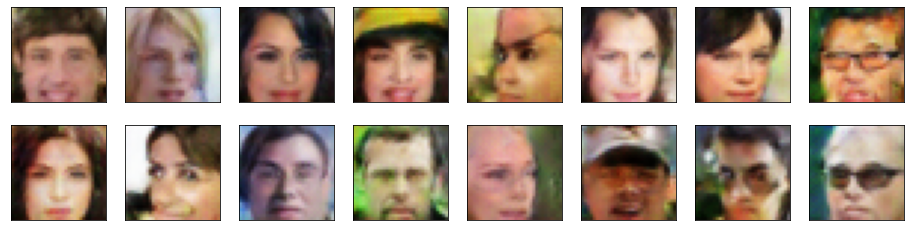

In [4]:
_ = view_samples(-1,samples)

In [7]:
import utils

In [8]:
G = utils.Generator(z_size = 100, conv_dim = 64)

In [9]:
PATH = './Face_Generator.pth'
G.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [10]:
G.cuda()

Generator(
  (fc): Linear(in_features=100, out_features=2048, bias=True)
  (t_conv1): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (t_conv2): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (t_conv3): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (t_conv4): Sequential(
    (0): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
)

In [11]:
z = np.random.uniform(-1,1,(1,100))

In [12]:
z = torch.from_numpy(z).float().cuda()

In [20]:
image = G(z)

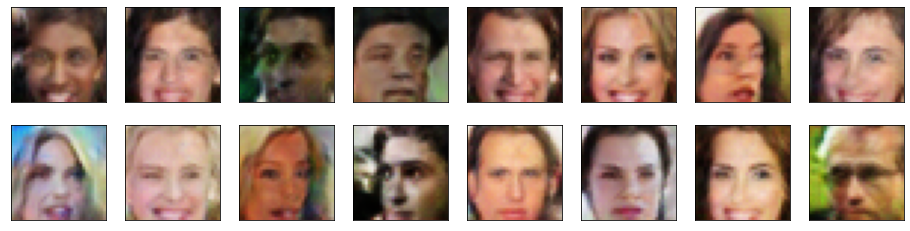

In [12]:
_ = view_samples(0, [images])

In [21]:
image.shape

torch.Size([1, 3, 32, 32])

In [22]:
type(image)

torch.Tensor

In [25]:
image = image.detach().cpu().numpy()

In [26]:
image.shape

(1, 3, 32, 32)

In [28]:
image = np.transpose(image[0], (1,2,0))

In [29]:
image.shape

(32, 32, 3)

In [31]:
image = ((image + 1)*255/(2)).astype(np.uint8)

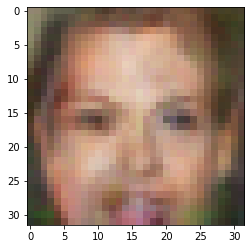

In [32]:
plt.imshow(image)

In [33]:
import cv2

In [36]:
image = cv2.resize(image, (1000,1000))

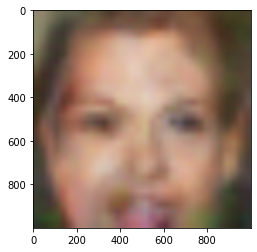

In [37]:
plt.imshow(image)